#### <i> Forecasting Energy Consumption  with ML Models for Improved Accuracy and Resource Management 25210 </i>
#### <i> Dataset Link --> https://www.kaggle.com/datasets/ajinilpatel/energy-consumption-prediction </i>
#### <i> Import Library Files </i>

In [1]:
import pandas as pd
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### <i> Load The Dataset </i>

In [2]:
data = pd.read_csv("Energy_consumption_dataset.csv")
data

Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0         1     0  Saturday      No    25.139433  43.431581    1565.693999   
1         1     1  Saturday      No    27.731651  54.225919    1411.064918   
2         1     2  Saturday      No    28.704277  58.907658    1755.715009   
3         1     3  Saturday      No    20.080469  50.371637    1452.316318   
4         1     4  Saturday      No    23.097359  51.401421    1094.130359   
...     ...   ...       ...     ...          ...        ...            ...   
4995     12     6    Sunday     Yes    26.338718  52.580000    1563.567259   
4996     12    17    Monday      No    20.007565  42.765607    1999.982252   
4997     12    13  Thursday     Yes    26.226253  30.015975    1999.982252   
4998     12     8  Saturday     Yes    24.673206  50.223939    1240.811298   
4999     12     1  Saturday     Yes    25.802872  41.798829    1793.658686   

      Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0             5        On           Off         2.774699          75.364373  
1             1        On            On        21.831384          83.401855  
2             2       Off           Off         6.764672          78.270888  
3             1       Off            On         8.623447          56.519850  
4             9        On           Off         3.071969          70.811732  
...         ...       ...           ...              ...                ...  
4995          7        On            On        20.591717          70.270344  
4996          5       Off            On         7.536319          73.943071  
4997          5       Off            On        28.162193          85.784613  
4998          2        On            On        20.918483          63.784001  
4999          6       Off           Off         8.334079          53.263278  

[5000 rows x 12 columns]

### <i> Dataset Overview </i>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [4]:
data.describe()

Month         Hour  Temperature     Humidity  SquareFootage  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      6.251200    11.556000    24.946823    45.478146    1507.403201   
std       3.588687     6.888306     3.041678     8.972690     293.147209   
min       1.000000     0.000000    20.007565    30.015975    1000.512661   
25%       3.000000     6.000000    22.453790    38.111104    1253.906598   
50%       6.000000    11.000000    24.831846    45.793124    1513.581105   
75%       9.000000    18.000000    27.427281    52.696651    1754.846457   
max      12.000000    23.000000    29.998671    59.969085    1999.982252   

         Occupancy  RenewableEnergy  EnergyConsumption  
count  5000.000000      5000.000000        5000.000000  
mean      4.576000        15.201195          76.794919  
std       2.906185         9.157038           9.231573  
min       0.000000         0.006642          53.263278  
25%       2.000000         7.477928          70.419588  
50%       5.000000        15.343830          76.696267  
75%       7.000000        22.889997          83.246274  
max       9.000000        29.965327          99.201120

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
# Checking for missing values
print(data.isnull().sum())

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


In [7]:
# Convert categorical variables to string for proper visualization
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Holiday'] = data['Holiday'].astype('category')
data['HVACUsage'] = data['HVACUsage'].astype('category')
data['LightingUsage'] = data['LightingUsage'].astype('category')

### <i> Data Visulization And Analysis </i>

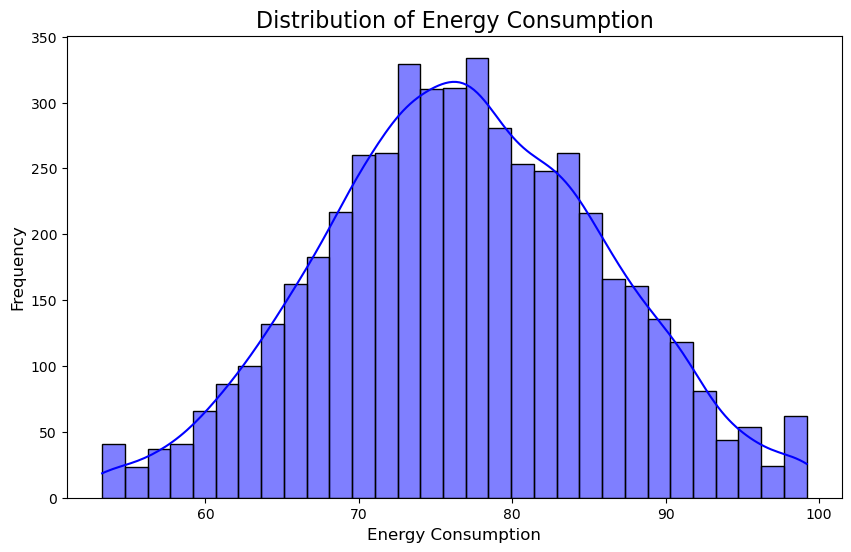

In [8]:
# --- Visualizations ---
#  Energy Consumption Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['EnergyConsumption'], kde=True, color='blue')
plt.title('Distribution of Energy Consumption', fontsize=16)
plt.xlabel('Energy Consumption', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [9]:
# 3D Scatter Plot of Energy Consumption with Temperature and Humidity
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='EnergyConsumption',
                    color='Holiday', size='Occupancy', 
                    title='3D Scatter Plot: Energy Consumption vs Temperature and Humidity',
                    labels={'Temperature': 'Temperature (°C)', 'Humidity': 'Humidity (%)'},
                    template='plotly_dark')
fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

In [10]:
# Interactive Heatmap of Energy Consumption by Hour and Day of the Week
pivot_table = data.pivot_table(index='Hour', columns='DayOfWeek', values='EnergyConsumption', aggfunc='mean')
fig = px.imshow(pivot_table, 
                title='Heatmap: Average Energy Consumption by Hour and Day of the Week',
                color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Day of the Week', yaxis_title='Hour of the Day')
fig.show()


In [11]:
# Bar Chart: Renewable Energy Contribution by Month
fig = px.bar(data, x='Month', y='RenewableEnergy', color='Holiday', 
             title='Monthly Renewable Energy Contribution (Holiday Highlight)',
             labels={'RenewableEnergy': 'Renewable Energy (kWh)', 'Month': 'Month'},
             template='presentation')
fig.update_traces(marker_line_width=1.5)
fig.show()

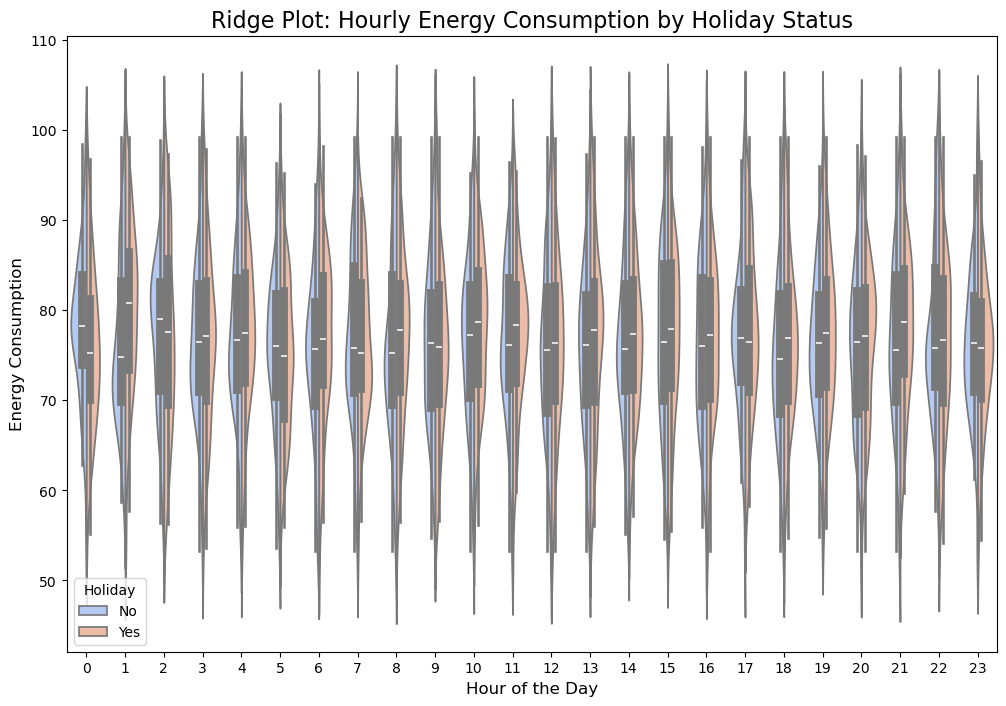

In [12]:
# Custom Ridge Plot for Hourly Energy Consumption
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Hour', y='EnergyConsumption', hue='Holiday', split=True, palette='coolwarm')
plt.title('Ridge Plot: Hourly Energy Consumption by Holiday Status', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Holiday')
plt.show()

# 6. **Parallel Categories Plot for HVAC and Lighting Usage**
fig = px.parallel_categories(data, dimensions=['HVACUsage', 'LightingUsage', 'Holiday'],
                             color='EnergyConsumption',
                             title='Parallel Categories Plot: HVAC, Lighting, and Holiday',
                             labels={'HVACUsage': 'HVAC Usage', 'LightingUsage': 'Lighting Usage'},
                             color_continuous_scale='Bluered')
fig.show()

In [13]:
# Dynamic Line Plot for Hourly Energy Trends
fig = px.line(data, x='Hour', y='EnergyConsumption', color='Holiday', 
              line_group='DayOfWeek', title='Hourly Energy Consumption Trends (Holiday Highlight)',
              markers=True, labels={'Hour': 'Hour of the Day', 'EnergyConsumption': 'Energy Consumption (kWh)'})
fig.update_traces(line=dict(width=2))
fig.show()

In [14]:
# Occupancy vs Energy Consumption with Multiple Dimensions
fig = px.scatter(data, x='Occupancy', y='EnergyConsumption', size='Temperature',
                 color='HVACUsage', 
                 title='Occupancy vs Energy Consumption with HVAC Usage and Temperature',
                 template='seaborn')
fig.show()

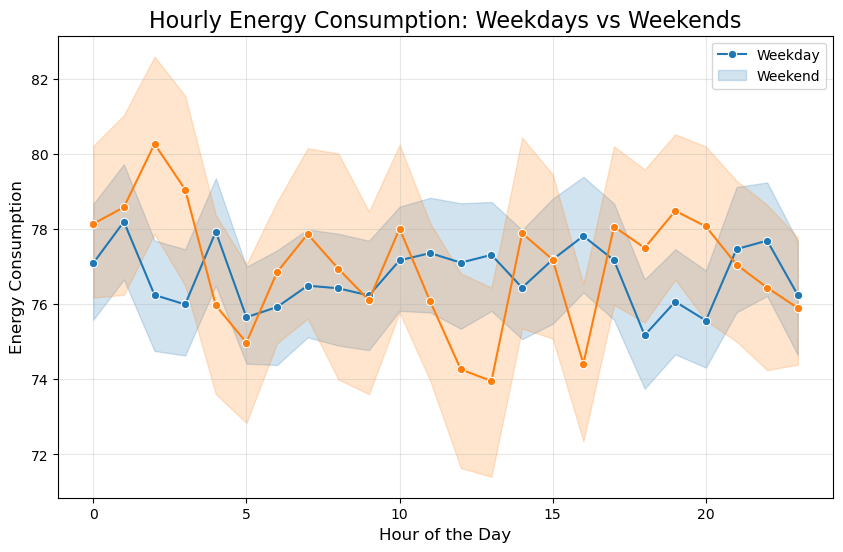

In [15]:
#  Hourly Energy Consumption for Weekdays vs Weekends
data['IsWeekend'] = data['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='EnergyConsumption', hue='IsWeekend', data=data, palette='tab10', marker='o')
plt.title('Hourly Energy Consumption: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(labels=['Weekday', 'Weekend'])
plt.grid(alpha=0.3)
plt.show()

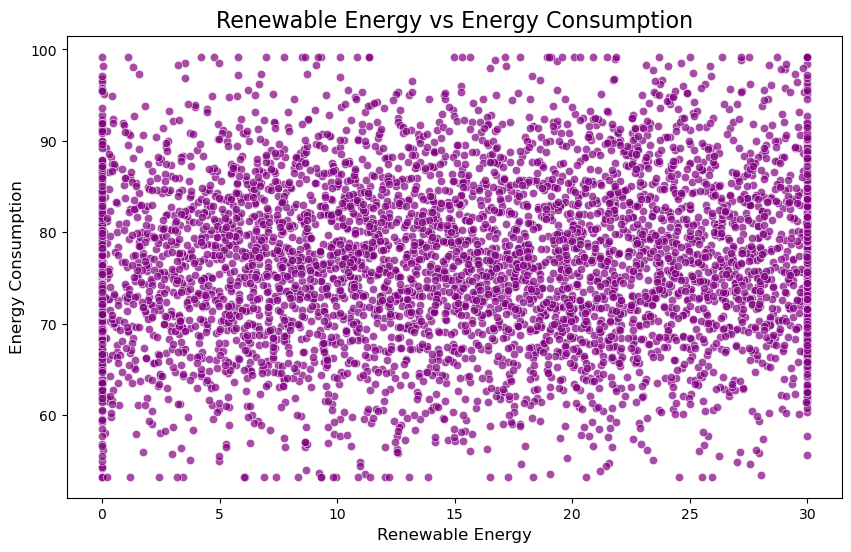

In [16]:
#Renewable Energy Contribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RenewableEnergy', y='EnergyConsumption', data=data, color='purple', alpha=0.7)
plt.title('Renewable Energy vs Energy Consumption', fontsize=16)
plt.xlabel('Renewable Energy', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.show()

### <i> Data Preprocessing </i>

In [17]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Preprocessing Steps ---

# 1. Handle Missing Values
if data.isnull().sum().any():
    print("Missing values detected. Filling with median for numerical and mode for categorical columns.")
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].median(), inplace=True)

# 2. Encoding Categorical Variables
# Columns to encode: 'DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage'
label_encoders = {}
categorical_columns = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed later

# 3. Feature Scaling
# Standardize numerical columns: 'Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy'
numerical_columns = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 4. Feature Selection
# Dropping irrelevant columns
# Assume 'Month', 'Hour', and 'DayOfWeek' are relevant for classification
features = ['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity', 
            'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']
target = 'EnergyConsumption'

# Create a binary classification target (example: above or below median energy consumption)
data['EnergyClass'] = (data[target] > data[target].median()).astype(int)

# 5. Splitting the Data
X = data[features]
y = data['EnergyClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (3500, 11)
Testing data shape: (1500, 11)


### <i> Modeling </i>
### <i> Logistic Regression </i>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")


Logistic Regression Results:
Confusion Matrix:
[[538 212]
 [236 514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       750
           1       0.71      0.69      0.70       750

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500

Accuracy: 0.7013


### <i> Random Forest Classifier </i>

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Results:
Confusion Matrix:
[[527 223]
 [233 517]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       750
           1       0.70      0.69      0.69       750

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500

Accuracy: 0.6960


### <i> XGboost </i>

In [20]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


XGBoost Results:
Confusion Matrix:
[[497 253]
 [242 508]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       750
           1       0.67      0.68      0.67       750

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.67      0.67      0.67      1500

Accuracy: 0.6700


### <i> Comparison Of All Models </i>

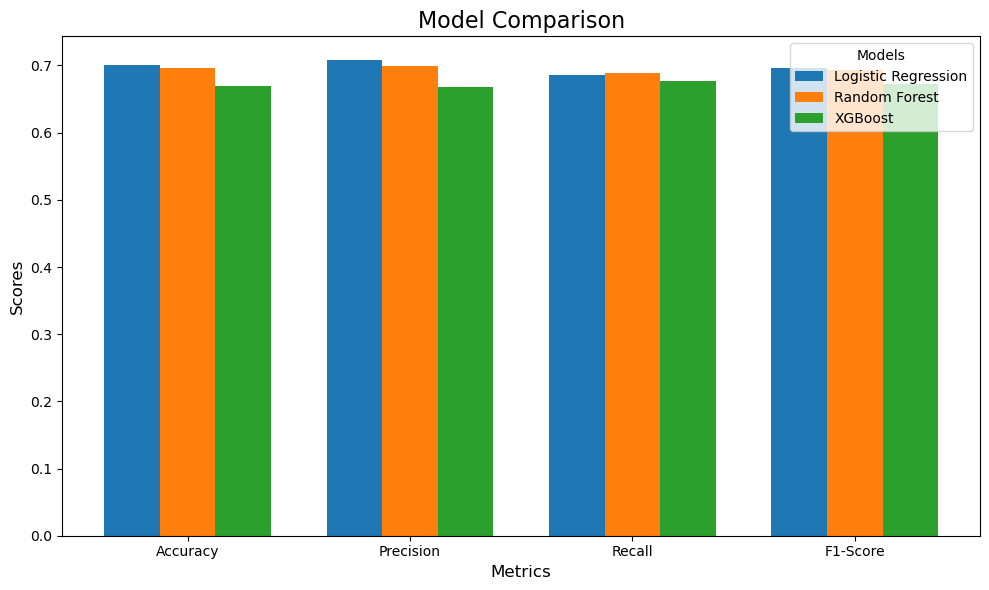

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate metrics
def calculate_metrics(model_name, y_test, y_pred):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    return metrics

# Collect metrics for all models
results = []

# Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
results.append(calculate_metrics("Logistic Regression", y_test, y_pred_logistic))

# Random Forest
y_pred_rf = random_forest_model.predict(X_test)
results.append(calculate_metrics("Random Forest", y_test, y_pred_rf))

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
results.append(calculate_metrics("XGBoost", y_test, y_pred_xgb))

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)

# --- Visualization ---
# Bar plot for model comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics))  # the label locations

# Bar width
width = 0.25

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's metrics
for i, model in enumerate(results_df['Model']):
    ax.bar(x + i * width, results_df.iloc[i, 1:], width, label=model)

# Add labels, title, and legend
ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Model Comparison", fontsize=16)
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend(title="Models")

# Display the bar plot
plt.tight_layout()
plt.show()
